In [1]:
import torch
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
from ae_model import AeNet
from kdd_oh_set import ohkdd

In [2]:
use_gpu = torch.cuda.is_available()
train_data = ohkdd(use_gpu=use_gpu,test_size=0)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, drop_last=True)
print("use_gpu:{}".format(use_gpu))

use_gpu:True


In [3]:
net = AeNet(126, [80, 40, 10, 40, 80])
loss_func = torch.nn.MSELoss()
opt = torch.optim.Adam(net.parameters(), lr=1e-4)

In [4]:
%%time
loss_count = []
if use_gpu:
    net = net.cuda()
    loss_func = loss_func.cuda()

for epoch in range(10):
    for i, (x, _) in enumerate(train_loader):
        batch_x = Variable(x)

        out = net(batch_x)  #模型输出
        # print(out.shape)
        loss = loss_func(out, batch_x)  #损失计算

        opt.zero_grad()  #消除旧值
        loss.backward()  #回传
        opt.step()  #更新模型参数

        if i % 10000 == 0:  #打点输出
            loss_count.append(loss)
            print("{}th{}:\t".format(epoch + 1, i), loss.item())

    torch.save(net, r'aenet_10key')  #存储模型

1th0:	 0.17927518486976624
1th10000:	 0.008324186317622662
1th20000:	 0.004473803099244833
1th30000:	 0.004569115582853556
1th40000:	 0.003363572061061859
2th0:	 0.003423690563067794
2th10000:	 0.0031316494569182396
2th20000:	 0.0046767196618020535
2th30000:	 0.00391688896343112
2th40000:	 0.002343820407986641
3th0:	 0.0032593219075351954
3th10000:	 0.0026057488285005093
3th20000:	 0.0020278466399759054
3th30000:	 0.0029703821055591106
3th40000:	 0.0016125038964673877
4th0:	 0.0019125835970044136
4th10000:	 0.002140537602826953
4th20000:	 0.0013878759928047657
4th30000:	 0.0013825575588271022
4th40000:	 0.0036313775926828384
5th0:	 0.0015407903119921684
5th10000:	 0.001347021316178143
5th20000:	 0.001626542885787785
5th30000:	 0.0014698173617944121
5th40000:	 0.0020831217989325523
6th0:	 0.0008948897593654692
6th10000:	 0.0018385534640401602
6th20000:	 0.0010861351620405912
6th30000:	 0.0016582233365625143
6th40000:	 0.0017118010437116027
7th0:	 0.0012814666843041778
7th10000:	 0.00097

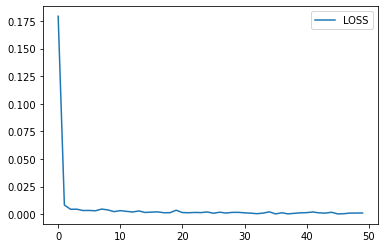

In [5]:
plt.figure('aenet_loss')
plt.plot(loss_count, label='LOSS')
plt.legend()
plt.show()